# Vesiculas en ojo


Author:  Luis Miguel Sanchez-Brea

History: init - 180406

Project: Foco

_

Después de la reunión del jueves 5 de abril de 2008 intento reconstruir el campo en las vesículas. Utilizaré los datos del paper que hemos hecho.

Tomo los datos de la Figura 2:  vesícula de 1.5 um de radio (no son 3 um) y una capa de 50 nanometros de espesor.

Indice de refracción de proteina: 1.62
Índice de refracción del agua: 1.33

**concentración: **


**Índice: **


*Nota*

Elimino el campo incidente

** Resumen **

Indice de refraccion de la capa: 1.62
Índice de refracción del interno 1.62*1.04 (incremento de 4%)

Indice de refracción del medio externo: 

![title](foco1.png)



## Definiciones

In [1]:
from __future__ import print_function, division

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

%config InlineBackend.figure_format = 'png'

from pprint import  pprint

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:898: MatplotlibDeprecationWarning: The backend.qt4 rcParam was deprecated in version 2.2.  In order to force the use of a specific Qt binding, either import that binding first, or set the QT_API environment variable.
  mplDeprecation)


In [2]:
from phyton_optics import sp, plt, mm, um, nm, degrees

from phyton_optics.scalar_sources_X import Scalar_source_X
from phyton_optics.utils_common import ndgrid

from phyton_optics.scalar_masks_XZ import Scalar_mask_XZ

import matplotlib.cm as cm

In [3]:
n_water=1.33
n_protein=1.62

def n_medium(c):
    """índice de refracción en función de la concentración"""
    return n_water + c * (n_protein-n_water)

In [4]:
def field_vesicula(radius, c, wavelength=550*nm, has_incident_field = False, num_points=1024):
    """campo generado por la vesícula en función de la concentración
    
    Args:
        radius (float): radio de la vesícula
        c (float): [0,1] concentración
        has_incident_field (bool): Quitar campo inicial
        wavelength (float): wavelength
     """

    n_capa=n_protein
    n_externo=n_medium(c)
    n_interno=n_externo*1.04
    shell=50*nm

    x_lim=radius+3*um

    x0 = sp.linspace(-x_lim,x_lim , num_points)
    z0 = sp.linspace(-1 * um, 2*radius+1*um, num_points) #26 mm

    X, Z = ndgrid(x0, z0)

    u0 = Scalar_source_X(x0, wavelength)
    u0.plane_wave(A=1, theta=0 * degrees)

    vesicula = Scalar_mask_XZ(x=x0,z=z0,wavelength=wavelength,n_background=n_externo)
    vesicula.incident_field(u0)

    if has_incident_field is False:
        vesicula.BPM(verbose=False)
        campo_vacio=vesicula.u
        vesicula.u=sp.zeros_like(vesicula.u,dtype=complex)

    vesicula.sphere(r0=(0*um,radius), radius=(radius+shell,radius+shell),
                    angle=0, refraction_index= n_capa )
    vesicula.sphere(r0=(0*um,radius), radius=(radius,radius), angle=0,
                    refraction_index= n_interno )
    
    #propagación
    vesicula.BPM(verbose=False)

    # para 1024x1024 son 297 ms por loop
    # para 2048x2048 son 969 ms por loop
    
    if has_incident_field is False:
        # elimino el campo inicial
        vesicula.u=vesicula.u-campo_vacio
    
    return vesicula

## Campo cercano

In [5]:
vesicula0_1=field_vesicula(radius=1.5*um, c=0.1, wavelength=550*nm, 
                           has_incident_field = False, num_points=1024*2)
vesicula0_5=field_vesicula(radius=1.5*um, c=0.5, wavelength=550*nm, 
                           has_incident_field = False, num_points=1024*2)

In [6]:
x_lim=vesicula0_1.x[-1]-2*um

(-2.5, 2.5)

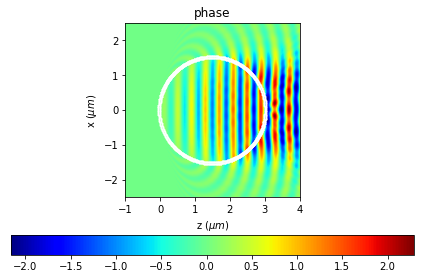

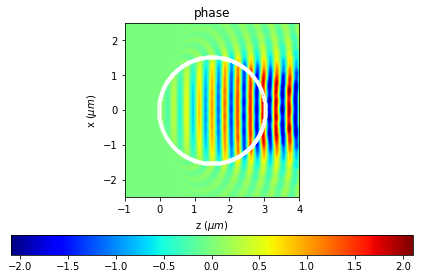

In [7]:
# esto es real(u)
vesicula0_1.draw(kind='real', logarithm=False,  draw_borders=True, 
                 scale='scaled', colorbar_kind='horizontal', colormap_kind=cm.jet)
plt.ylim(-x_lim, x_lim)

vesicula0_5.draw(kind='real', logarithm=False, draw_borders=True, 
                 scale='scaled', colorbar_kind='horizontal', colormap_kind=cm.jet)
plt.ylim(-x_lim, x_lim)

(-2.5, 2.5)

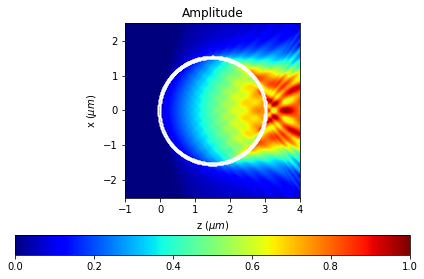

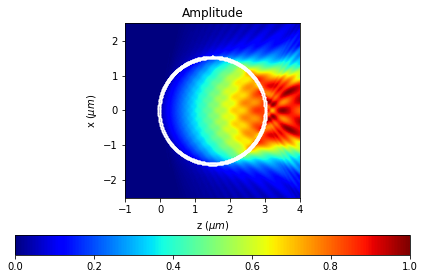

In [8]:
# esto es abs(u)
vesicula0_1.draw(kind='amplitude', logarithm=False, normalize='maximum',
              draw_borders=True, scale='scaled', colorbar_kind='horizontal', 
                 colormap_kind=cm.jet)
plt.ylim(-x_lim, x_lim)

# esto es abs(u)
vesicula0_5.draw(kind='amplitude', logarithm=False, normalize='maximum',
              draw_borders=True, scale='scaled', colorbar_kind='horizontal', 
                 colormap_kind=cm.jet)
plt.ylim(-x_lim, x_lim)

## Campo lejano

(-90, 90)

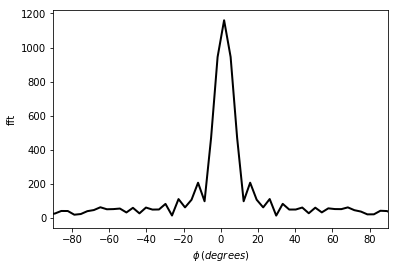

In [9]:
ultimo0_1=vesicula0_1.final_field()
ultimo0_1.fft(remove0=False,shift=True,matrix=False,new_field=False)
ultimo0_1.draw(kind='fft')
plt.xlim(-90,90)

(-90, 90)

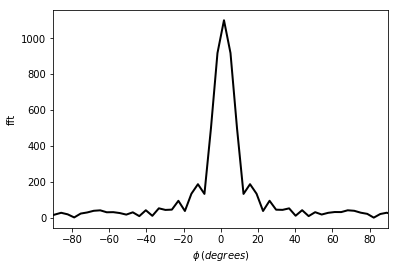

In [10]:
ultimo0_5=vesicula0_5.final_field()
ultimo0_5.fft(remove0=False,shift=True,matrix=False,new_field=False)
ultimo0_5.draw(kind='fft')
plt.xlim(-90,90)